In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
advert=pd.read_csv('Advertising_sales.csv')

In [3]:
advert.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
advert.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [6]:
advert.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Linear Regression

In [7]:
x=advert[['TV']]

In [8]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [9]:
y=advert.Sales

In [10]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [12]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=linreg.predict(x_test)

In [14]:
from sklearn import metrics as m

In [15]:
m.mean_absolute_error(y_test,y_pred)

2.4659827815717366

In [16]:
m.mean_squared_error(y_test,y_pred)

10.85934532560827

In [17]:
np.sqrt(m.mean_squared_error(y_test,y_pred))

3.2953520791575928

In [18]:
m.r2_score(y_test,y_pred)  # accuarcy on testing dataset

0.41535307148347844

X_train , Y_train > Model Building


In [19]:
y_train_pred= linreg.predict(x_train)

m.r2_score(y_train,y_train_pred)  # accuarcy on traing dataset

0.6393874827744095

# Multiple Linear Regression

In [20]:
advert

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [21]:
advert.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
advert.shape

(200, 4)

In [24]:
import seaborn as sns

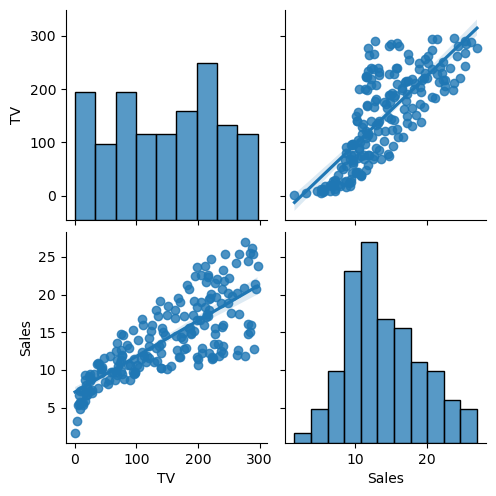

In [25]:
sns.pairplot(advert,vars=['TV','Sales'],kind='reg') #kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}


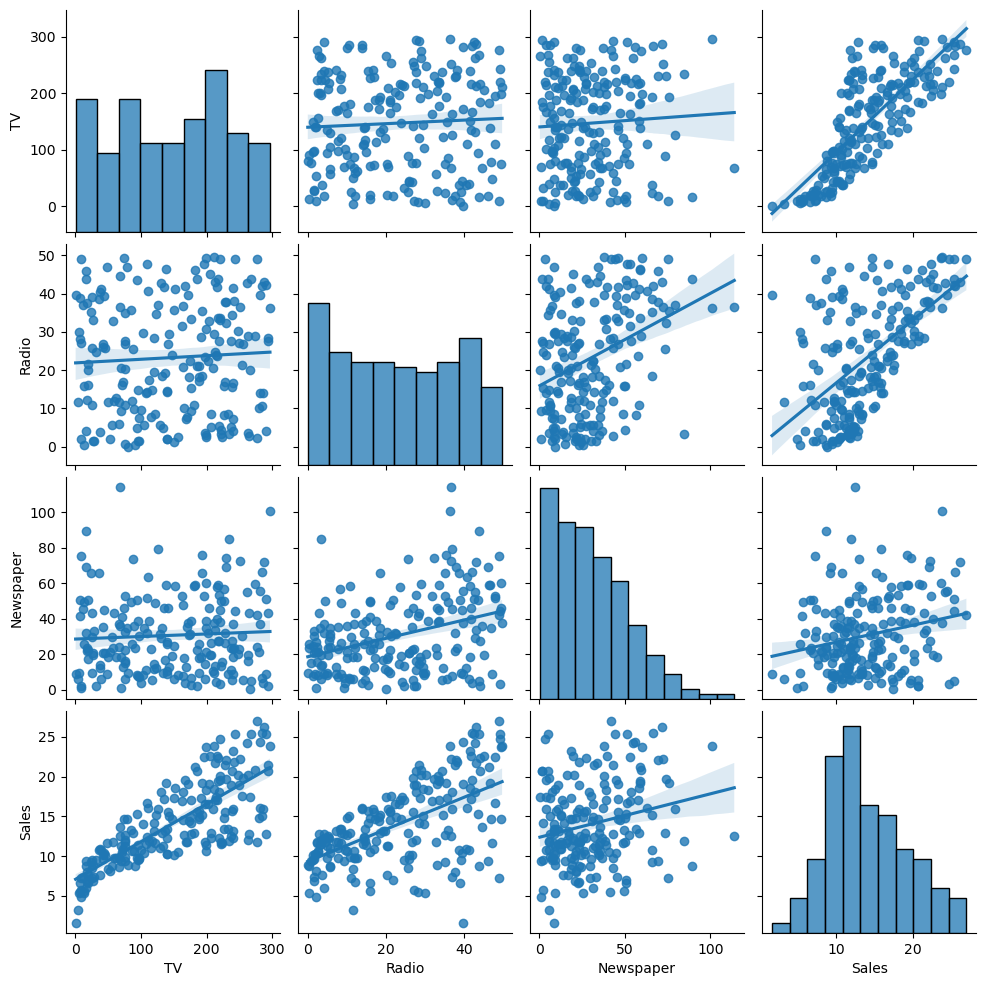

In [26]:
sns.pairplot(advert,kind='reg')

In [27]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

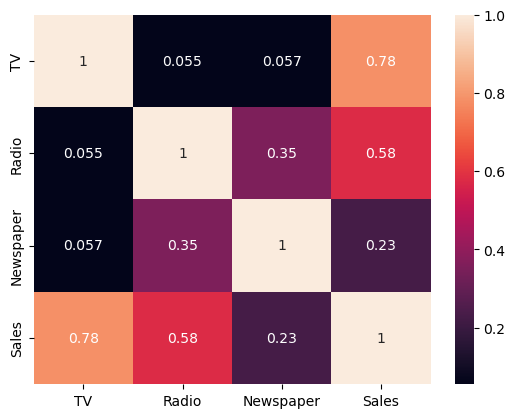

In [28]:
sns.heatmap(advert.corr(),annot=True) # annot, If True, write the data value in each cell.

In [29]:
x=advert[['TV','Radio','Newspaper']]

In [30]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [31]:
y=advert.Sales

In [32]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [34]:
print(x_train)

        TV  Radio  Newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]


In [35]:
print(x_test)

        TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
198  283.6   42.0       66.2
95   163.3   31.6       52.9
4    180.8   10.8       58.4
29    70.6   16.0       40.8
168  215.4   23.6       57.6
171  164.5   20.9       47.4
18    69.2   20.5       18.3
11   214.7   24.0        4.0
89   109.8   47.8       51.4
110  225.8    8.2       56.5
118  125.7   36.9       79.2
159  131.7   18.4       34.6
35   290.7    4.1        8.5
136   25.6   39.0        9.3
59   210.7   29.5        9.3
51   100.4    9.6        3.6
16    67.8   36.6      114.0
44    25.1   25.7       43.3
94   107.4   14.0       10.9
31   112.9   17.4       38.6
162  188.4   18.1       25.6
38    43.1   26.7       35.1
28   248.8   27.1       22.9
193  166.8   42.0        3.6
27   240.1   16.7       22.9
47   239.9   41.5       18.5
165  234.5    3.4       84.8
194  149.7   35.6        6.0
177  170.2    

In [36]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [37]:
print(x_train)

[[-1.47861420e+00 -1.50740896e+00 -2.07096465e-01]
 [-5.93912087e-01 -1.51399099e+00 -3.21290955e-01]
 [-1.41452194e+00 -7.37311102e-01 -3.11774748e-01]
 [ 7.07389725e-01  6.31751749e-01  7.63556698e-01]
 [-1.54499547e+00  3.15814168e-01  5.44683926e-01]
 [ 5.73110715e-02  3.93687845e-02 -5.16373209e-01]
 [-7.33541657e-01  1.54665433e+00  2.16374768e-01]
 [ 9.80926342e-01  9.47689330e-01  9.74221741e-02]
 [ 7.17690268e-01  1.43475977e+00 -4.92582690e-01]
 [ 9.98093912e-01  5.92259551e-01  2.10534195e+00]
 [ 1.68708573e+00  1.25046284e+00  1.01097809e+00]
 [-2.19659059e-01  7.43646309e-01 -8.35166159e-01]
 [-1.40651040e+00 -4.80611817e-01 -3.64113889e-01]
 [ 4.61321221e-01  1.50716213e+00  1.36783587e+00]
 [ 1.41126010e+00 -2.17330500e-01 -1.41089671e+00]
 [ 2.66755427e-01 -8.75533794e-01 -5.87744765e-01]
 [ 8.72198398e-01 -1.17830731e+00 -1.21450598e-01]
 [-1.34241814e+00 -8.09713464e-01 -1.20142119e-02]
 [ 1.02785103e+00 -9.67682255e-01 -1.01121600e+00]
 [-1.13640730e+00  1.71009443e-

In [38]:
print(x_test)

[[ 7.84071539e-01  1.73095125e+00  3.68634087e-01]
 [ 6.89077651e-01 -6.59437425e-02  7.83897591e-02]
 [-5.33253340e-01 -1.44158863e+00 -1.07307135e+00]
 [ 1.57835778e+00 -8.68951761e-01 -4.06936823e-01]
 [ 1.27620855e+00 -1.31764072e-01  2.26009928e-03]
 [ 1.61727094e+00  1.23071675e+00  1.72469365e+00]
 [ 2.40431819e-01  5.46185321e-01  1.09186586e+00]
 [ 4.40720137e-01 -8.22877530e-01  1.35356156e+00]
 [-8.20524012e-01 -4.80611817e-01  5.16135303e-01]
 [ 8.36718753e-01  1.96226857e-02  1.31549673e+00]
 [ 2.54165875e-01 -1.58092204e-01  8.30170150e-01]
 [-8.36547078e-01 -1.84420335e-01 -5.54438039e-01]
 [ 8.28707221e-01  4.59508174e-02 -1.23484687e+00]
 [-3.71878181e-01  1.61247466e+00  1.02049430e+00]
 [ 9.55747239e-01 -9.94010386e-01  1.26315759e+00]
 [-1.89901938e-01  8.95033066e-01  2.34324714e+00]
 [-1.21231657e-01 -3.22643027e-01  2.21132871e-01]
 [ 1.69853077e+00 -1.26387374e+00 -1.02073221e+00]
 [-1.33555111e+00  1.03325576e+00 -9.82667375e-01]
 [ 7.82927034e-01  4.07962629e-

In [39]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [40]:
linreg.intercept_

13.811250000000001

In [41]:
linreg.coef_

array([4.09287129, 2.7126018 , 0.05435329])

    *Y= a1x1+ a2x2+a3+x3+b
    *y (Sales) =a1TV+ a2Radio+ a3Newspaper +b
    *y(Sales)= (4.09287129) TV + (2.7126018) Radio + (0.05435329) Newsapaper +13.811250000000001
    

In [42]:
y_pred=linreg.predict(x_test)

In [43]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [44]:
print(y_test)

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
Name: Sales, dtype: float64


In [45]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

     Actual  Predicted
58     23.8  21.735772
40     16.6  16.456938
34      9.5   7.659932
102    14.8  17.892027
184    17.6  18.677307
198    25.5  23.862719
95     16.9  16.336236
4      12.9  13.456492
29     10.5   9.177296
168    17.1  17.360562
171    14.5  14.467799
18     11.3   9.856976
11     17.4  17.260570
89     16.7  16.718669
110    13.4  15.095303
118    15.9  15.589237
159    12.9  12.451882
35     12.8  17.279252
136     9.5  11.094411
59     18.4  18.068899
51     10.7   9.334331
16     12.5  12.913458
44      8.5   8.784280
94     11.5  10.466707
31     11.9  11.403032
162    14.9  15.031047
38     10.1   9.784794
28     18.9  19.460286
193    19.6  18.229549
27     15.9  17.195890
47     23.2  21.603042
165    11.9  14.719014
194    17.3  16.292055
177    11.7  12.364323
176    20.2  19.988313
97     15.5  15.375564
174    11.5  13.966783
73     11.0  10.068095
69     22.3  20.971973
172     7.6   7.458778


In [46]:
from sklearn import metrics as m 

In [47]:
m.mean_absolute_error(y_test,y_pred)

1.0402154012924723

In [48]:
m.mean_squared_error(y_test,y_pred)

1.9918855518287923

In [49]:
np.sqrt(m.mean_squared_error(y_test,y_pred ))

1.4113417558581594

In [50]:
m.r2_score(y_test,y_pred)

0.8927605914615383

# Bias and Vraiance

Tortal record=200 records
   * Dataset1: Train Dataset  (160 Records)  { 160  X_train and 160 Y train} Model has seen this dataset in training phase
   * Dataset2: Test Dataset  (40 Records)  (40 X_test and 40 Y_test) UNSEEN data -> Model has no knowledge of this edata

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [52]:
from sklearn.metrics import r2_score


y_train_pred=linreg.predict(x_train)   # Training dataset 
print("RMSE :Training Set")
print(np.sqrt(m.mean_squared_error(y_train,y_train_pred)))  # RMSE Training
print("R2 Score :Training Set")
print(r2_score(y_train, y_train_pred))    #R2 Training



y_test_pred=linreg.predict(x_test)   # Test dataset 
print("RMSE :Test Set")
print(np.sqrt(m.mean_squared_error(y_test,y_test_pred)))  # RMSE Test
print("R2 Score :Test Set")
print(r2_score(y_test, y_test_pred))    #R2 Test

#Variance = Bais of train (1.736902590147092) - bIas of Test(1.4113417558581594)


RMSE :Training Set
1.736902590147092
R2 Score :Training Set
0.8959372632325174
RMSE :Test Set
1.4113417558581594
R2 Score :Test Set
0.8927605914615383


# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)

print("RMSE :Training Set")
print(np.sqrt(m.mean_squared_error(y_train,pred_train_rr)))  # RMSE Training
print("R2 Score :Training Set")
print(r2_score(y_train, pred_train_rr))    #R2 Training

pred_test_rr= rr.predict(x_test)

print("RMSE :Test Set")
print(np.sqrt(m.mean_squared_error(y_test,pred_test_rr))) # RMSE Testining
print("R2 Score :Test Set")
print(r2_score(y_test, pred_test_rr))  # R2 Testining

RMSE :Training Set
1.7369053262931264
R2 Score :Training Set
0.8959369353717952
RMSE :Test Set
1.4114339875992916
R2 Score :Test Set
0.8927465747281528


In [54]:
print(rr.intercept_)

13.811250000000001


In [55]:
print(rr.coef_)

[4.09039051 2.71071608 0.05528077]


# LASSO Regression

In [56]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print("RMSE :Training Set")
print(np.sqrt(m.mean_squared_error(y_train,pred_train_lasso)))
print("R2 Score :Training Set")
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(x_test)
print("RMSE :Test Set")
print(np.sqrt(m.mean_squared_error(y_test,pred_test_lasso)))
print("R2 Score :Test Set")
print(r2_score(y_test, pred_test_lasso))

RMSE :Training Set
1.7429431206670047
R2 Score :Training Set
0.8952121941459656
RMSE :Test Set
1.410339505592532
R2 Score :Test Set
0.8929128473727164


In [57]:
print(model_lasso.intercept_)

13.811250000000001


In [58]:
print(model_lasso.coef_)

[4.00235498 2.64195196 0.        ]


    * MLR-   4.09287129, 2.7126018 , 0.05435329
    *LASSO - 4.00235498 2.64195196 0. 
    *RIDGE - 4.09039051 2.71071608 0.05528077

# LassoCV

In [59]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0])

lasso_cv.fit(x_train, y_train) #RIDGE REGRESSION

pred_train_lasso_cv= lasso_cv.predict(x_train) #PREDICTIONS ON TRAINING SET

print('MSE: TRAINING SET')
print(np.sqrt(m.mean_squared_error(y_train,pred_train_lasso_cv)))
print('SCORE: TRAINING SET')
print(r2_score(y_train, pred_train_lasso_cv))

pred_test_lasso_cv= lasso_cv.predict(x_test) # PREDICTIONS ON TESTING TEST

print('MSE: TESTING SET')
print(np.sqrt(m.mean_squared_error(y_test,pred_test_lasso_cv))) 
print('SCORE: TESTING SET')
print(r2_score(y_test, pred_test_lasso_cv))

MSE: TRAINING SET
1.7429431206670047
SCORE: TRAINING SET
0.8952121941459656
MSE: TESTING SET
1.410339505592532
SCORE: TESTING SET
0.8929128473727164


In [60]:
print(lasso_cv.alpha_)

0.1


In [61]:
print(lasso_cv.intercept_)

13.811250000000001


In [62]:
print(lasso_cv.coef_)

[4.00235498 2.64195196 0.        ]


# RidgeCV

In [63]:
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10.0])

regr_cv.fit(x_train, y_train) #RIDGE REGRESSION

pred_train_regr_cv= regr_cv.predict(x_train) #PREDICTIONS ON TRAINING SET

print('MSE: TRAINING SET')
print(np.sqrt(m.mean_squared_error(y_train,pred_train_regr_cv)))
print('SCORE: TRAINING SET')
print(r2_score(y_train, pred_train_regr_cv))

pred_test_regr_cv= regr_cv.predict(x_test) # PREDICTIONS ON TESTING TEST

print('MSE: TESTING SET')
print(np.sqrt(m.mean_squared_error(y_test,pred_test_regr_cv))) 
print('SCORE: TESTING SET')
print(r2_score(y_test, pred_test_regr_cv))

MSE: TRAINING SET
1.7369053262931313
SCORE: TRAINING SET
0.8959369353717946
MSE: TESTING SET
1.4114339875992503
SCORE: TESTING SET
0.892746574728159


In [64]:
print(regr_cv.alpha_)

0.1


In [65]:
print(regr_cv.intercept_)

13.811250000000001


In [66]:
print(regr_cv.coef_)

[4.09039051 2.71071608 0.05528077]
